In [75]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Data

In [76]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Update this path to match your actual file location in Drive
file_path = '/content/drive/MyDrive/Bayes/data_processed-v2.csv'

df = pd.read_csv(file_path)
df = df.drop(columns=["Unnamed: 0"])  # drop extra index column
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,glucose_level_group,bmi_group
0,Male,Old,No,Yes,Yes,Work,Urban,formerly smoked,Yes,High,Obese
1,Male,Old,No,Yes,Yes,Work,Rural,never smoked,Yes,Normal,Obese
2,Female,Middle-aged,No,No,Yes,Work,Urban,smokes,Yes,High,Obese
3,Female,Old,Yes,No,Yes,Work,Rural,never smoked,Yes,High,Normal
4,Male,Old,No,No,Yes,Work,Urban,formerly smoked,Yes,High,Overweight


## Preprocess Data

In [77]:
X_raw = df.drop(columns=["stroke"])
y_raw = df["stroke"]

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_encoded = encoder.fit_transform(X_raw)
X_encoded = pd.DataFrame(X_encoded)
X_encoded.fillna(X_encoded.mode().iloc[0], inplace=True)

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_raw)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.8, stratify=y_resampled, random_state=42
)

In [79]:
X_resampled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0


In [80]:
pd.concat([X_resampled, y_resampled], axis=1).head()

,0,1,2,3,4,5,6,7,8,9,stroke
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,Yes
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,Yes
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,Yes
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Yes
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,Yes


## Naive Bayes

Classification Report:

              precision    recall  f1-score   support

   No Stroke       0.74      0.66      0.70      2596
      Stroke       0.70      0.77      0.73      2596

    accuracy                           0.72      5192
   macro avg       0.72      0.72      0.72      5192
weighted avg       0.72      0.72      0.72      5192



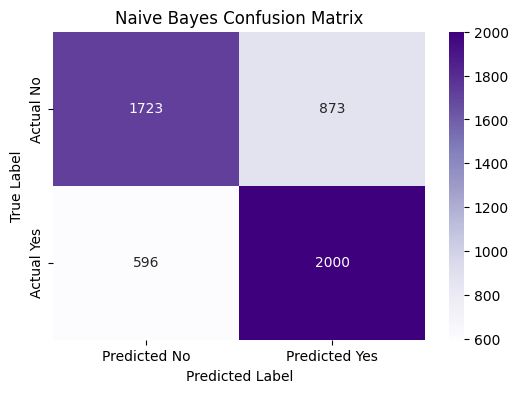

MSE: 0.2829
RMSE: 0.5319


In [78]:
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


label_mapping = {'No': 0, 'Yes': 1}
y_test_int = pd.Series(y_test).map(label_mapping)
y_pred_int = pd.Series(y_pred).map(label_mapping)


print("Classification Report:\n")
print(classification_report(y_test_int, y_pred_int, target_names=["No Stroke", "Stroke"]))

cm = confusion_matrix(y_test_int, y_pred_int)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# 10. MSE & RMSE
mse = mean_squared_error(y_test_int, y_pred_int)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


## Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.89      0.91      0.90      2596
      Stroke       0.91      0.89      0.90      2596

    accuracy                           0.90      5192
   macro avg       0.90      0.90      0.90      5192
weighted avg       0.90      0.90      0.90      5192



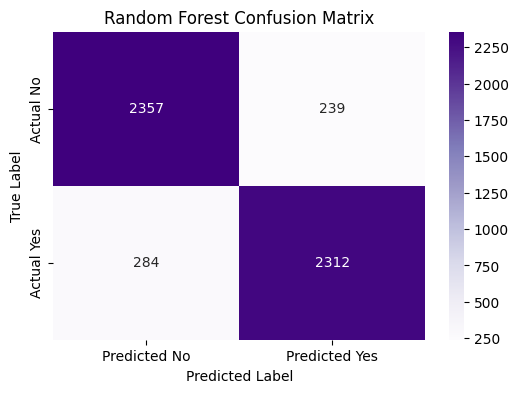

MSE: 0.1007
RMSE: 0.3174


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["No Stroke", "Stroke"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# MSE & RMSE
# Convert string labels to integers
label_mapping = {"No": 0, "Yes": 1}
y_test_int = pd.Series(y_test).map(label_mapping)
y_pred_int = pd.Series(y_pred_rf).map(label_mapping)

# MSE & RMSE
mse = mean_squared_error(y_test_int, y_pred_int)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


## XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.93      0.95      0.94      2596
      Stroke       0.95      0.92      0.94      2596

    accuracy                           0.94      5192
   macro avg       0.94      0.94      0.94      5192
weighted avg       0.94      0.94      0.94      5192



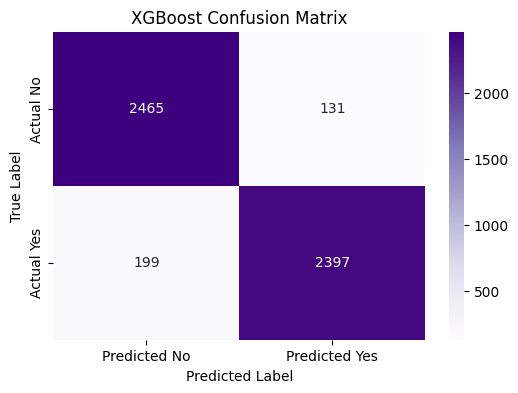

MSE: 0.0636
RMSE: 0.2521


In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Encode string labels to integers
label_mapping = {'No': 0, 'Yes': 1}
y_train_int = pd.Series(y_train).map(label_mapping)
y_test_int = pd.Series(y_test).map(label_mapping)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_int)
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test_int, y_pred_xgb, target_names=["No Stroke", "Stroke"]))

# Confusion Matrix
cm = confusion_matrix(y_test_int, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# MSE & RMSE
mse = mean_squared_error(y_test_int, y_pred_xgb)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

## Logistic

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.66      0.71      0.68      2596
      Stroke       0.68      0.63      0.65      2596

    accuracy                           0.67      5192
   macro avg       0.67      0.67      0.67      5192
weighted avg       0.67      0.67      0.67      5192



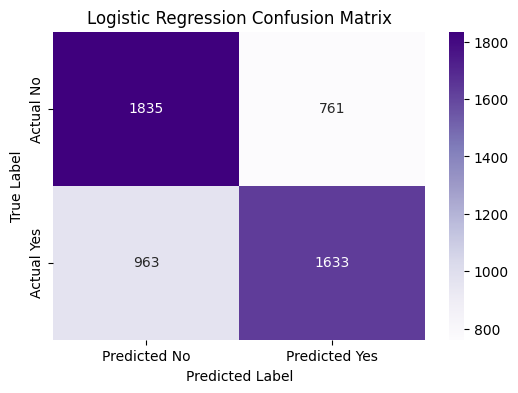

MSE: 0.3320
RMSE: 0.5762


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Encode string labels to integers
label_mapping = {'No': 0, 'Yes': 1}
y_train_int = pd.Series(y_train).map(label_mapping)
y_test_int = pd.Series(y_test).map(label_mapping)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train_int)
y_pred_log = log_model.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test_int, y_pred_log, target_names=["No Stroke", "Stroke"]))

# Confusion Matrix
cm = confusion_matrix(y_test_int, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# MSE & RMSE
mse = mean_squared_error(y_test_int, y_pred_log)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Output()

Bayesian Logistic Regression Report:
              precision    recall  f1-score   support

   No Stroke       0.66      0.71      0.68      2596
      Stroke       0.68      0.63      0.65      2596

    accuracy                           0.67      5192
   macro avg       0.67      0.67      0.67      5192
weighted avg       0.67      0.67      0.67      5192



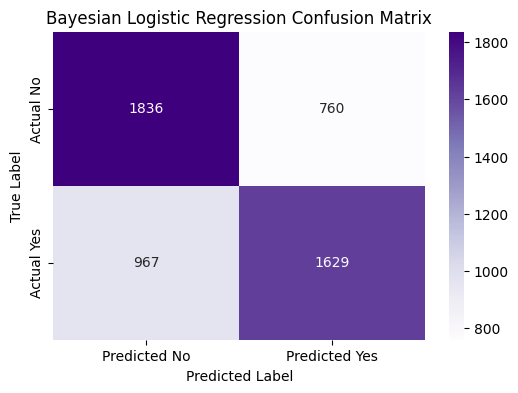

MSE: 0.3326
RMSE: 0.5767


In [88]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Convert string labels to 0 and 1
label_mapping = {'No': 0, 'Yes': 1}
y_train_bin = pd.Series(y_train).map(label_mapping).values
y_test_bin = pd.Series(y_test).map(label_mapping).values

# Cast to numpy for PyMC
X_train_np = X_train.values
X_test_np = X_test.values

# Build and sample from Bayesian logistic regression model
with pm.Model() as logistic_model:
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coefficients = pm.Normal("coefficients", mu=0, sigma=10, shape=X_train_np.shape[1])

    logits = intercept + pm.math.dot(X_train_np, coefficients)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_train_bin)

    # MCMC Sampling
    trace = pm.sample(1000, tune=1000, target_accept=0.9, random_seed=42)

# Predict on test set using posterior mean weights
intercept_post = trace.posterior["intercept"].mean().values
coef_post = trace.posterior["coefficients"].mean(axis=(0, 1)).values

logits_test = intercept_post + np.dot(X_test_np, coef_post)
probs_test = 1 / (1 + np.exp(-logits_test))
y_pred_bayes = (probs_test >= 0.5).astype(int)

# Evaluation
print("Bayesian Logistic Regression Report:")
print(classification_report(y_test_bin, y_pred_bayes, target_names=["No Stroke", "Stroke"]))

cm = confusion_matrix(y_test_bin, y_pred_bayes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Bayesian Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# MSE & RMSE
mse = mean_squared_error(y_test_bin, y_pred_bayes)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")